In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

import warnings
from sklearn.model_selection import GridSearchCV
from scripts.evaluate import evaluate_model
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
df= pd.read_csv('./data/heart_cleveland.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


<Axes: >

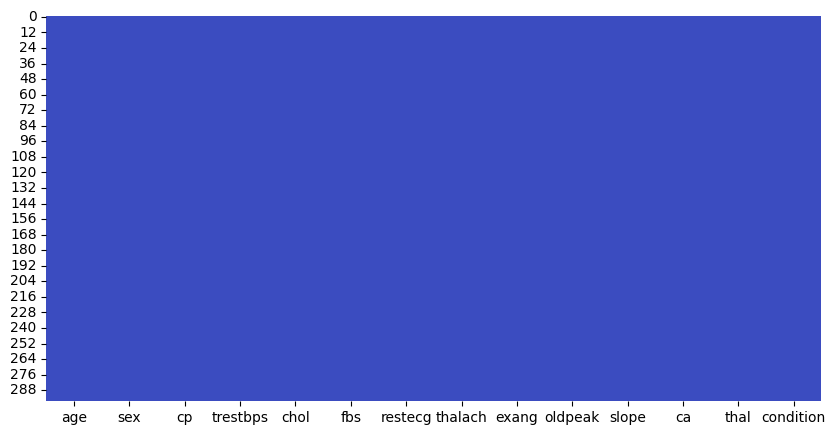

In [4]:
sns.heatmap(df.isnull(),cbar=False, cmap='coolwarm')

<Axes: >

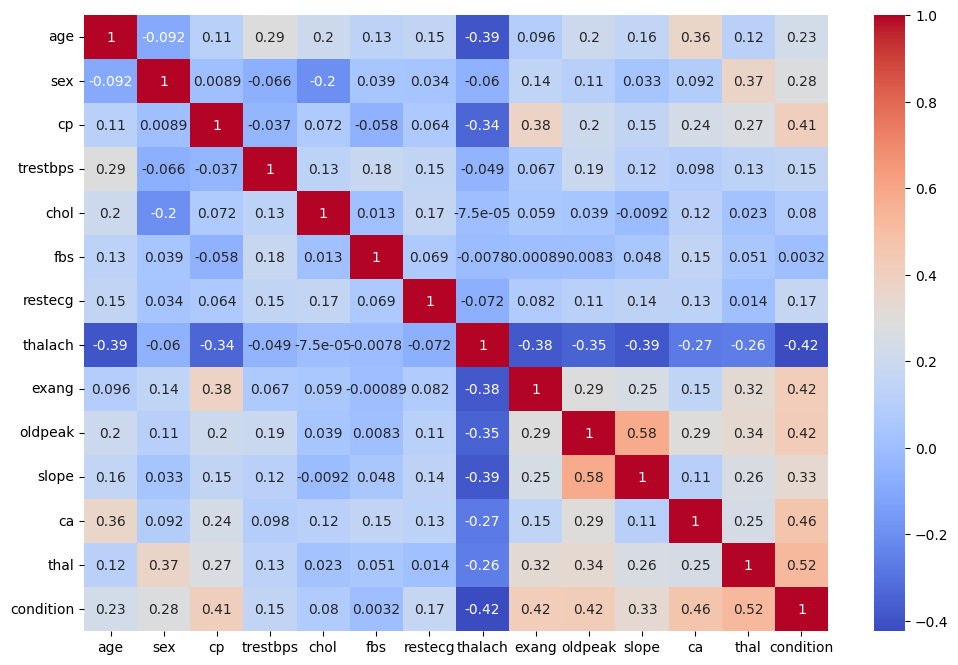

In [5]:
corr= df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [6]:
features_to_drop = [
    'slope',       # redundant with oldpeak
    'chol',        # weak correlation
    'trestbps',    # weak correlation
    'fbs',         # weak correlation
    'restecg'      # weak and hard to interpret
]
df_cleaned= df.drop(columns=features_to_drop)
print("Remaining features:", df_cleaned.columns.tolist())

X=df_cleaned.drop(columns=['condition'])
Y=df_cleaned['condition']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Remaining features: ['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'condition']


In [7]:
scaler= StandardScaler()

x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)



Model: LogisticRegression


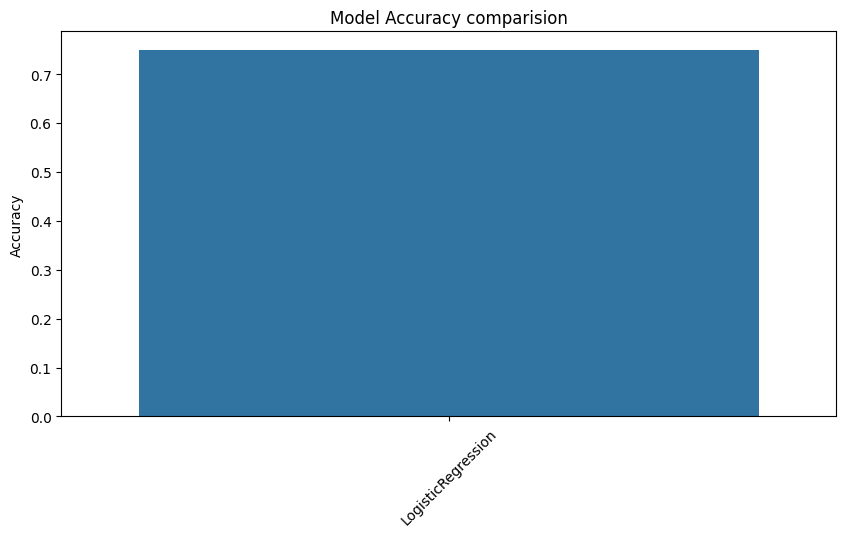

Model: RandomForestClassifier


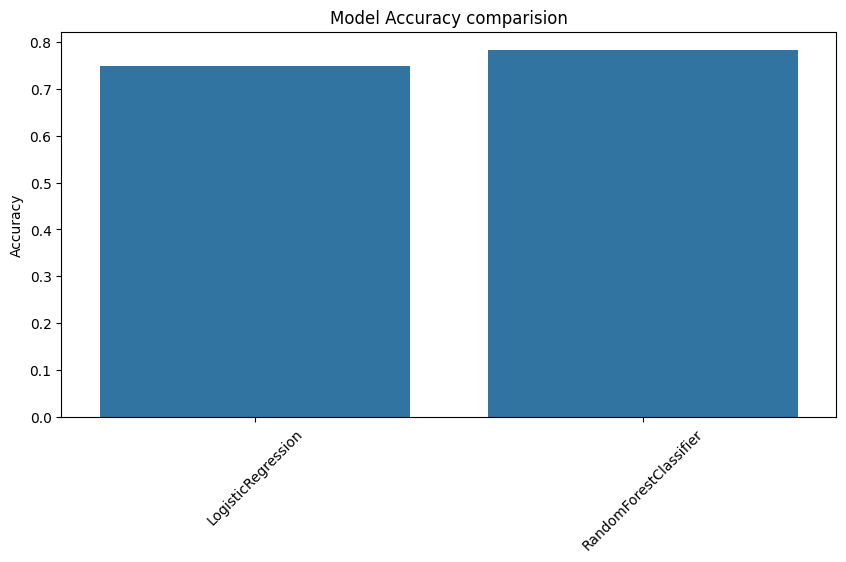

Model: SVC


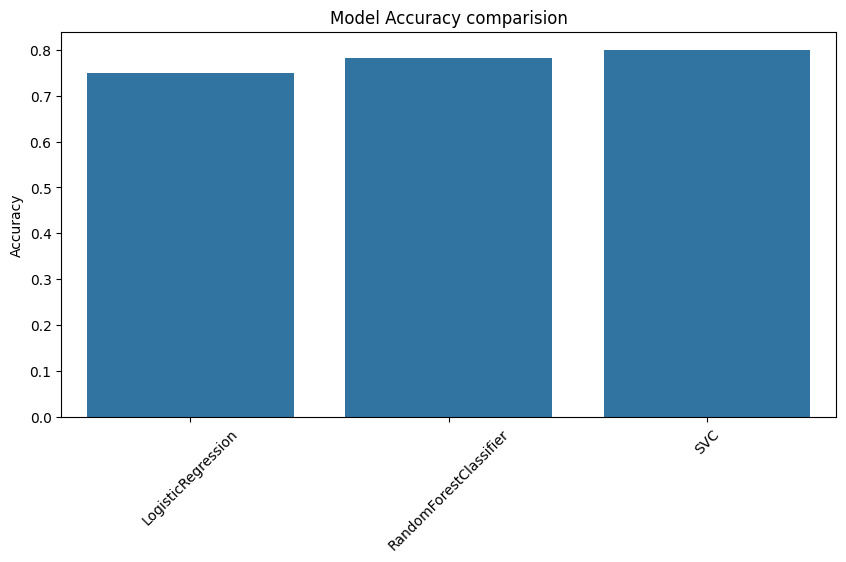

Model: KNeighborsClassifier


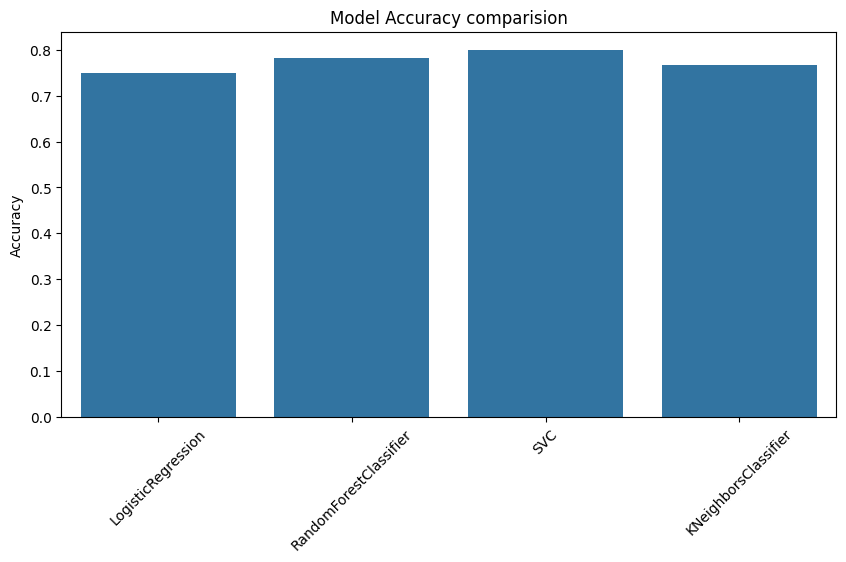

Model: GaussianNB


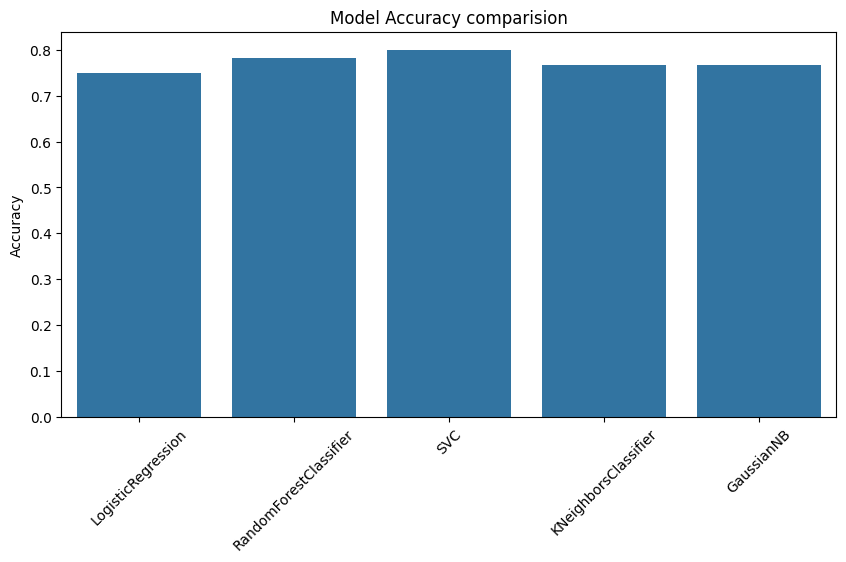

In [8]:
models=[
    LogisticRegression(),RandomForestClassifier(random_state=42),SVC(probability=True),KNeighborsClassifier(),GaussianNB()
]

for model in models:
    evaluate_model(model,x_train_scaled,y_train,x_test_scaled,y_test)

In [9]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10]
}

grid= GridSearchCV(RandomForestClassifier(random_state=42),param_grid, cv=5)